# Task 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BA_reviews.csv')
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | If you can’t fly First Class...
1,1,Not Verified | Singapore to Heathrow. Busine...
2,2,Not Verified | I reported my damaged/ruined ...
3,3,"Not Verified | On March 1st, I flew from Ber..."
4,4,Not Verified | The WORST customer experience! ...


In [3]:
df.shape

(1000, 2)

In [4]:
df.isna().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [5]:
# Removing Unwanted column

df = df.drop(columns = 'Unnamed: 0')

In [6]:
df.head()

,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...


Removing unwanted signs, symbols, words

In [7]:
df['reviews'] =df['reviews'].str.strip('✅')

In [8]:
df['reviews'] =df['reviews'].str.strip('Trip verified |')

In [9]:
df['reviews'] =df['reviews'].str.strip('Not verified |')

In [10]:
df['reviews'] =df['reviews'].str.strip('Verified |')

In [11]:
df['reviews'] =df['reviews'].str.strip('punctuation')

In [12]:
df.head()

,reviews
0,If you can’t fly First Class don’t fly British...
1,Singapore to Heathrow. Business class on an A3...
2,I reported my damaged/ruined suitcase 5 weeks ...
3,"On March 1st, I flew from Berlin to São Pau..."
4,The WORST customer experience! British Airways...


In [13]:
df

,reviews
0,If you can’t fly First Class don’t fly British...
1,Singapore to Heathrow. Business class on an A3...
2,I reported my damaged/ruined suitcase 5 weeks ...
3,"On March 1st, I flew from Berlin to São Pau..."
4,The WORST customer experience! British Airways...
...,...
995,London Heathrow to Dubai. Last Sunday we unfor...
996,London to Seattle. My husband and I have used ...
997,Johannesburg to London. I booked a seat withou...
998,London to Milan. Evening outbound flight with ...


In [14]:
reviews = df.reviews

In [15]:
freq_words = pd.Series(''.join(reviews).lower().split()).value_counts()[:50]
freq_words

the         7349
to          5422
and         4511
a           3314
was         3281
i           2964
of          2067
in          2036
on          1798
for         1713
flight      1504
with        1386
we          1328
my          1322
that        1197
not         1169
they        1149
is          1131
were        1076
at          1074
it          1041
ba          1027
had          976
but          924
have         872
this         831
no           821
as           806
from         748
our          622
an           581
me           579
very         565
so           563
service      549
be           535
you          511
are          497
there        428
when         420
which        413
british      412
their        401
-            399
crew         396
one          396
by           392
business     383
get          378
food         377
Name: count, dtype: int64

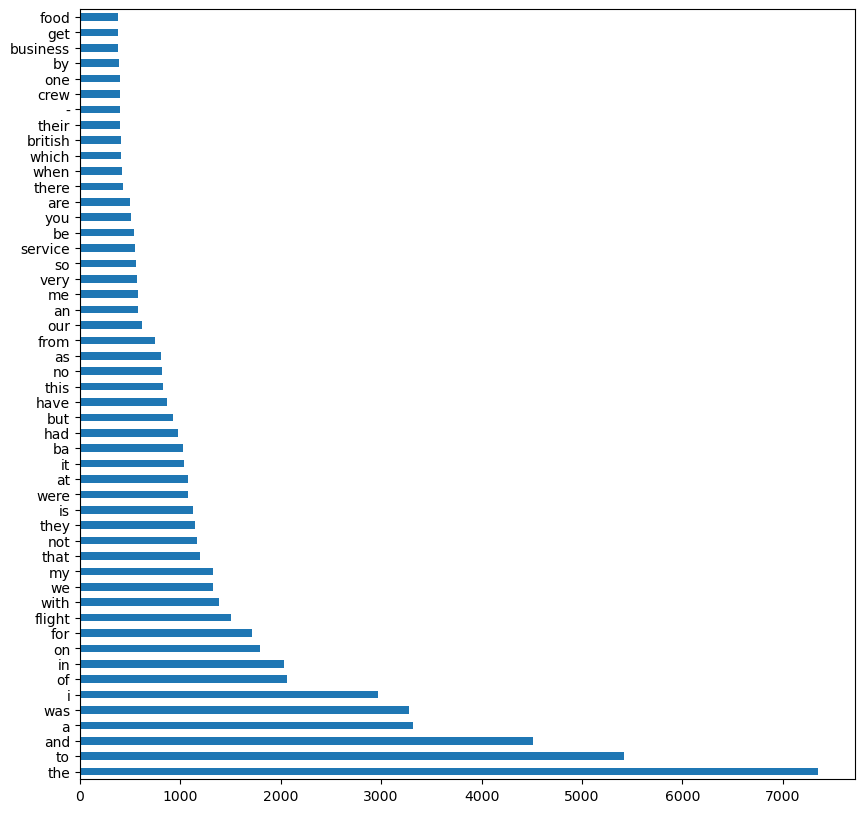

In [16]:
# Plotting barplot to get the most used words

plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0],y=freq_words[1])
plt.show()

In [17]:
import nltk
#nltk.download()

In [18]:
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('punkt')

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['reviews'].apply(get_sentiment)

In [21]:
df

,reviews,sentiment
0,If you can’t fly First Class don’t fly British...,negative
1,Singapore to Heathrow. Business class on an A3...,negative
2,I reported my damaged/ruined suitcase 5 weeks ...,positive
3,"On March 1st, I flew from Berlin to São Pau...",negative
4,The WORST customer experience! British Airways...,negative
...,...,...
995,London Heathrow to Dubai. Last Sunday we unfor...,negative
996,London to Seattle. My husband and I have used ...,positive
997,Johannesburg to London. I booked a seat withou...,negative
998,London to Milan. Evening outbound flight with ...,positive


In [22]:
np.unique(df['sentiment'], return_counts=True)

(array(['negative', 'neutral', 'positive'], dtype=object),
 array([512,  16, 472], dtype=int64))

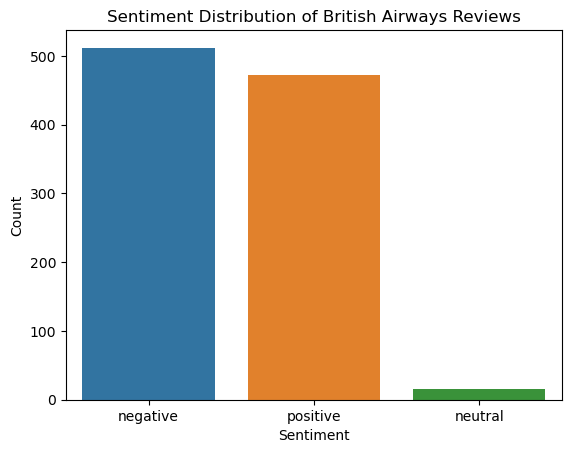

In [23]:
# Plot sentiment distribution

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution of British Airways Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Task 2

### Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [24]:
import numpy as np
import pandas as pd

In [25]:
data = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [26]:
data.shape

(50000, 14)

In [27]:
# Checking for null values

data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [28]:
# Dropping duplicates

data.drop_duplicates(inplace=True)

In [29]:
data.shape

(49281, 14)

In [30]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [31]:
data['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [32]:
#  df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data['flight_day'] = data['flight_day'].map(mapping)

In [33]:
data['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
data['sales_channel'] = le.fit_transform(data['sales_channel'])
data['trip_type'] = le.fit_transform(data['trip_type'])
data['route'] = le.fit_transform(data['route'])
data['booking_origin'] = le.fit_transform(data['booking_origin'])

In [37]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


In [38]:
data.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,0.108845,1.987460,84.723281,23.053976,9.070676,3.813620,392.313305,38.249589,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,0.311448,0.130733,90.410229,33.832149,5.413099,1.991913,227.270431,32.785767,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.000000,5.000000,2.000000,203.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.000000,9.000000,4.000000,382.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.000000,13.000000,5.000000,611.000000,58.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.000000,23.000000,7.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

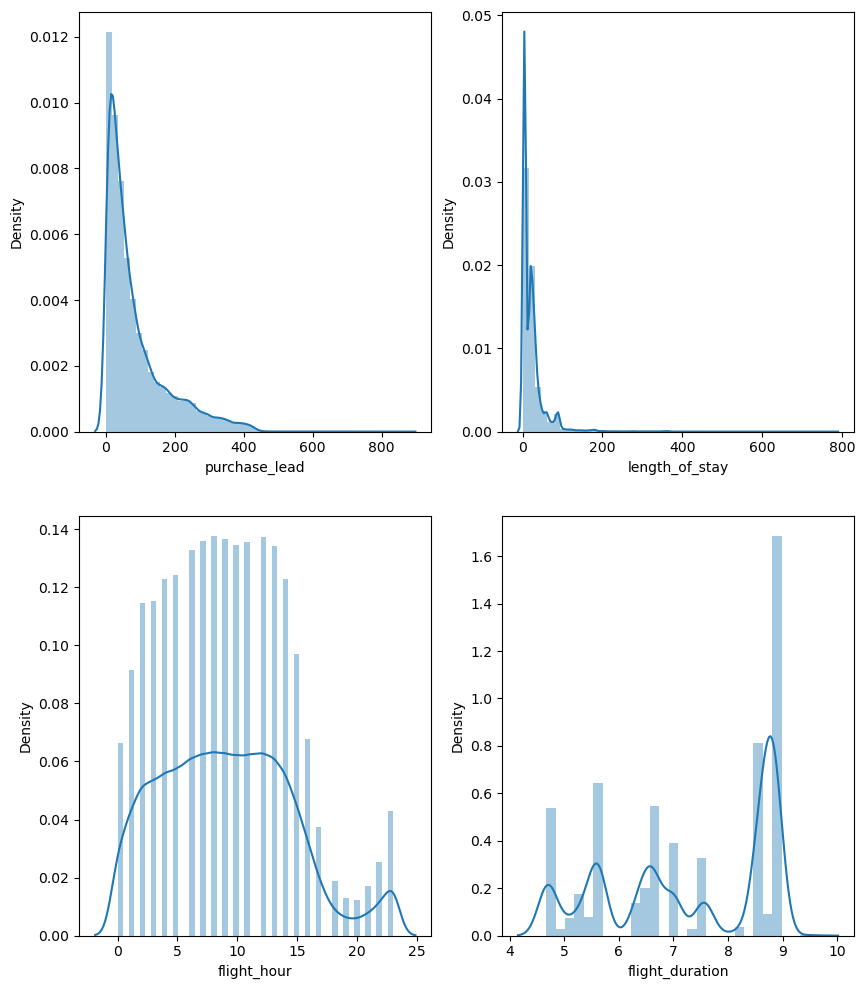

In [40]:
# Let's see how data is distributed for every column

plt.figure(figsize =(10,12))
plotnumber = 1

for column in data[['purchase_lead', 'length_of_stay','flight_hour','flight_duration']]:
    if plotnumber <= 4:   # as there are 9 columns in the data
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 10)
        
    plotnumber += 1
plt.show()

In [41]:
df = data[['purchase_lead', 'length_of_stay','flight_hour','flight_duration']]

In [42]:
from scipy.stats import zscore

z_score = zscore(data[['purchase_lead', 'length_of_stay','flight_hour','flight_duration']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score < 3).all(axis =1)

data = data[filtering_entry]

data.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,47516.000000,47516.000000,47516.000000,47516.00000,47516.000000,47516.000000,47516.000000,47516.000000,47516.000000,47516.000000,47516.000000,47516.000000,47516.000000,47516.000000
mean,1.584961,0.109837,1.987310,79.00825,20.148245,9.058149,3.810380,394.027086,38.131493,0.667038,0.295269,0.426277,7.270390,0.150497
std,1.014304,0.312689,0.131477,79.84249,21.660579,5.399795,1.982962,226.630612,32.840277,0.471278,0.456168,0.494540,1.499067,0.357561
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.00000,5.000000,5.000000,2.000000,208.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,50.00000,17.000000,9.000000,4.000000,386.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,110.00000,28.000000,13.000000,5.000000,611.000000,58.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,355.00000,124.000000,23.000000,7.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [43]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


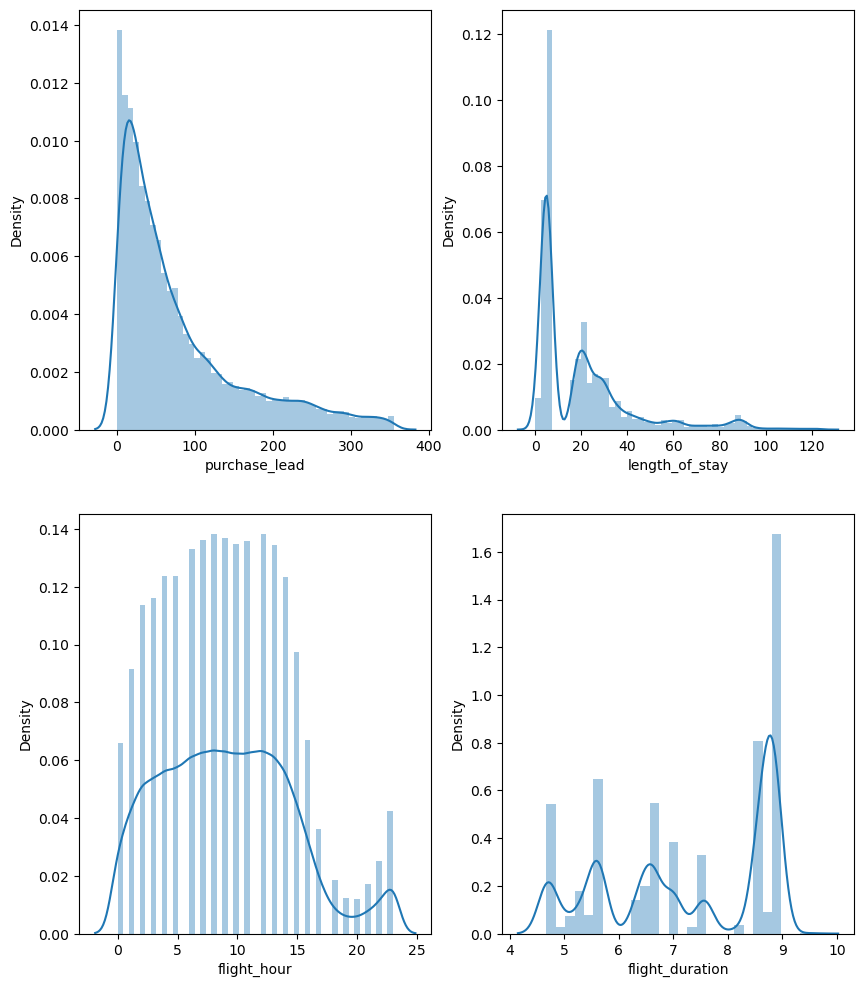

In [44]:
# Let's see how data is distributed for every column

plt.figure(figsize =(10,12))
plotnumber = 1

for column in data[['purchase_lead', 'length_of_stay','flight_hour','flight_duration']]:
    if plotnumber <= 4:   # as there are 9 columns in the data
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 10)
        
    plotnumber += 1
plt.show()

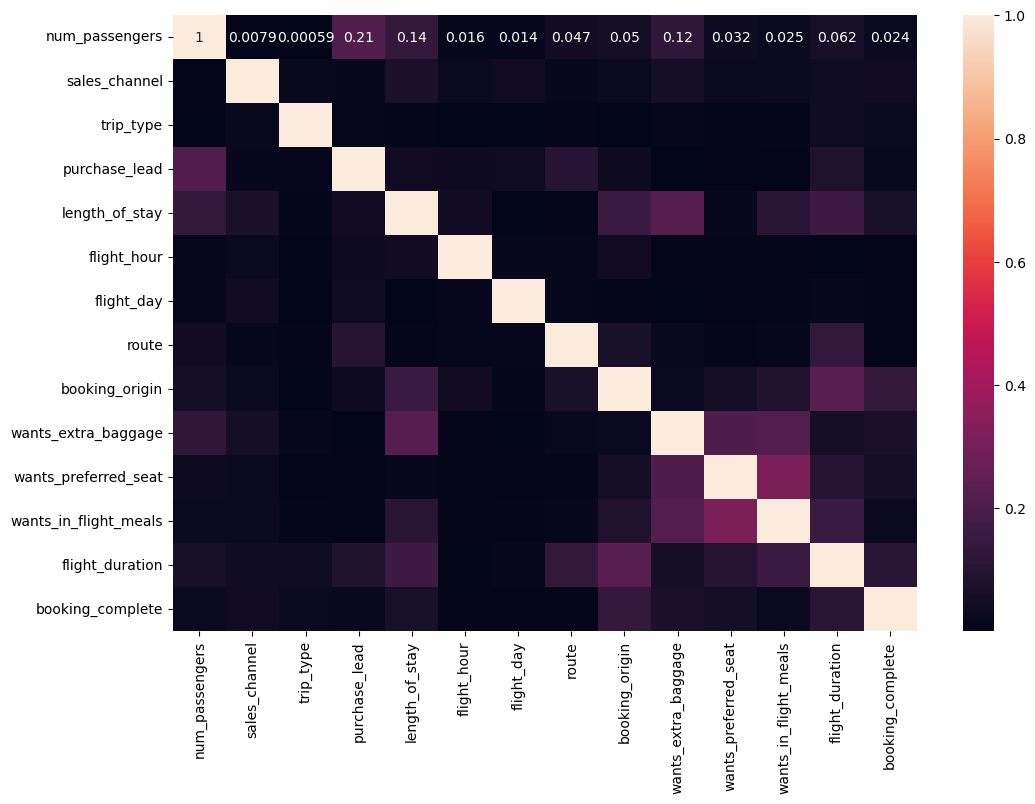

In [45]:
dff_corr = data.corr().abs()  # This will get the coefficient of one variable vs all other variable(Relationship)

plt.figure(figsize =(12,8))
sns.heatmap(dff_corr, annot = True, annot_kws ={'size':10})
plt.show()

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

In [47]:
x = data.drop(columns = 'booking_complete')
y = data.booking_complete

In [48]:
best_features = SelectKBest(score_func = f_classif, k = "all")

fit = best_features.fit(x,y)

data_scores = pd.DataFrame(fit.scores_)

data_columns = pd.DataFrame(x.columns)

# concatenate dataframes

feature_scores = pd.concat([data_columns, data_scores], axis = 1)

feature_scores.columns = ['Feature_Name','Score']   # name output columns

top_feature = feature_scores.nlargest(14,'Score')
print(top_feature)   # print 14 best features


             Feature_Name       Score
8          booking_origin  862.752231
12        flight_duration  558.440568
9     wants_extra_baggage  220.355956
4          length_of_stay  192.263301
10   wants_preferred_seat  129.807129
1           sales_channel   76.823613
2               trip_type   35.169760
11  wants_in_flight_meals   32.506678
0          num_passengers   27.564852
3           purchase_lead   26.703591
5             flight_hour    3.010156
7                   route    2.410085
6              flight_day    2.157731


In [49]:
top_feature.reset_index(drop = bool, inplace = True)

In [50]:
top_feature

,Feature_Name,Score
0,booking_origin,862.752231
1,flight_duration,558.440568
2,wants_extra_baggage,220.355956
3,length_of_stay,192.263301
4,wants_preferred_seat,129.807129
5,sales_channel,76.823613
6,trip_type,35.169760
7,wants_in_flight_meals,32.506678
8,num_passengers,27.564852
9,purchase_lead,26.703591


In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier()

In [54]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
train_pred = rf.predict(x_train)

In [56]:
print(accuracy_score(y_train,train_pred))
print(classification_report(y_train,train_pred))

0.9998316356595673
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30271
           1       1.00      1.00      1.00      5366

    accuracy                           1.00     35637
   macro avg       1.00      1.00      1.00     35637
weighted avg       1.00      1.00      1.00     35637



In [57]:
test_pred = rf.predict(x_test)

In [58]:
print(accuracy_score(y_test,test_pred))
print(classification_report(y_test,test_pred))

0.8504082835255493
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     10094
           1       0.51      0.10      0.16      1785

    accuracy                           0.85     11879
   macro avg       0.69      0.54      0.54     11879
weighted avg       0.81      0.85      0.80     11879

